<a href="https://colab.research.google.com/github/kristinak15/QM2-Group-4/blob/main/nlp_api.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import pylab
%matplotlib inline
pylab.rcParams['figure.figsize'] = (10., 8.)
import nltk
nltk.download('book')
from nltk.book import *

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/chat80.zip.
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package conll2000 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2000.zip.
[nltk_data]    | Downloading package conll2002 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2002.zip.
[nltk_data]    | Downloading package dependency_treebank to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/dependency_treebank.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    

In [2]:
# Clone the entire repo.
!git clone -l -s git://github.com/kristinak15/QM2-Group-4.git cloned-repo
%cd cloned-repo
!ls

Cloning into 'cloned-repo'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 748 (delta 26), reused 0 (delta 0), pack-reused 696
Receiving objects: 100% (748/748), 226.26 MiB | 34.47 MiB/s, done.
Resolving deltas: 100% (404/404), done.
/content/cloned-repo
 api
 ColabDocuments
 Copy_of_crop_prices_per_kg.ipynb
 crop_prices_per_kg.csv
 datasets_guide1.6.pdf
'FINAL DATA SETS'
 final_data_table.csv
 GM_corn_analysis.ipynb
 GM_corn_analysis_with_normalised_GDP.ipynb
 GM_crop_by_country.ipynb
 LICENSE
 Mapping_United_States.ipynb
 Pearson_GM_PO.ipynb
 processed_anti_GMO
 processed_pro_GMO
 README.md
'real gdp by state agriculture.csv'
'real gdp by state farms.csv'
 RHoMIS_Indicators.csv
'sentiment analysis'
'To do list'
 US_GM_crops_Visualisations.ipynb
 website


In [21]:
data = pd.read_csv('/content/cloned-repo/api/api.csv')

In [22]:
data.head()

,tweet,link,Unnamed: 2,Unnamed: 3
0,A German brand of food supplement organic and ...,https://t.co/bJyf5laljQ,NaN,NaN
1,RT @DrLeoRebello: The 5 Big Lies they do not w...,NaN,NaN,NaN
2,RT @ladydiaphanous: @___Prodigy___ @DrMadej @b...,NaN,NaN,NaN
3,@Chena_Punim Funny it’s a sign of zinc deficie...,https://t.co/Tmj7ffzAqH,NaN,NaN
4,RT @ChickenGate: @kirstiealley Check this out ...,NaN,NaN,NaN


In [23]:
data.drop(['Unnamed: 2','Unnamed: 3'], axis=1,inplace=True)

In [24]:
tweets = data.drop('link',axis=1)

In [25]:
value = 1 
tweets['value'] = value

In [26]:
tweets['tweet'] = tweets['tweet'].astype(str)

In [27]:
text = tweets.groupby('value')['tweet'].apply(' '.join).reset_index()

In [28]:
text

,value,tweet
0,1,A German brand of food supplement organic and ...


In [29]:
text = text.drop('value', axis=1)
text.reset_index(drop=True, inplace=True)

In [30]:
text['tweet'] = text['tweet'].astype(str)

In [31]:
text = text.iloc[0]['tweet']

In [32]:
text
newAPItext = "The hazards of asset allocation in a latestage major bubble  ()2rt @_reviveyourself when a guy who has enough money to end world hunger end poverty regenerate the soils and clean the oceans  instea3rt @gr33nbot us and china caught secretly testing gmo rice on children  @gr33nbot us and china caught secretly testing gmo rice on children  @farmpolicy mexico to decide if gmo corn ban will apply to animal feed * agriculture ministry will meet wit6rt @gr33nbot us and china caught secretly testing gmo rice on children  @mearth86 birth control electrical systems mobile / cell phones 2g3g4g5g medical advancements cancer treatments gmo foods mo8@adamwolach @kevinnbass @alexjleaf absolutely  it has been shown to happen with any exclusion labels gmo gluten free etc9us and china caught secretly testing gmo rice on children  are always mad when they cant understand what a person says what keri is asking people to understand that  hazards of asset allocation in a latestage major bubble  comments  so @twitter @twitterbrasil is it fine as per your regulations because per brazilian law it is a cri  @_reviveyourself when a guy who has enough money to end world hunger end poverty regenerate the soils and clean the oceans  instea14rt @farmpolicy mexico to decide if gmo corn ban will apply to animal feed * agriculture ministry will meet wit15the hazards of asset allocation in a latestage major bubble  hazards of asset allocation in a latestage major bubble   to decide if gmo corn ban will apply to animal feed * agriculture ministry will  @gmwatch brexit scotland may be forced to sell gmo food if england changes law  though the consultation is e19rt @gmwatch brexit scotland may be forced to sell gmo food if england changes law  though the consultation is e20rt @gmwatch brexit scotland may be forced to sell gmo food if england changes law  though the consultation is e21@sulka @gusv01 @merrittk @jim_unwin look at all those wonderful genetically modified foods almost everything we ea  hazards of asset allocation in a latestage major bubblel   ones  without gmo from other species and without pesticides and conjugate with agroecology permaculture  @bhadeanup the elites agenda is to control the population of the world under 500 crto cope up with the natureso gmo 5g vaccine f25failure to rule out allergenicity rendersmonsantos gmo hammond study inconclusive   gmo version of castoroides perhaps  @edwardjcornwell @kylelord_ @mdlnnttng @merrittk except that the gmo varieties created are a lot more destructive to the natural enviro28the next generation will be the feral gmo children we thought were lost to the melting ice caps29@neon_woof if theyre on hrt do they count as a gmo30rt @kylelord_ @merrittk this is why being antigmo makes no sense every food we eat is a gmo we genetically modify plants and animals to31why non gmo labels are a bunch of bullshit its all wild mustard  @mearth86 birth control electrical systems mobile / cell phones 2g3g4g5g medical advancements cancer treatments gmo foods mo33rt @onebodyisrael israelites caught waiting in line for gmo chicken on the lords sabbath day  onebodyinyahawashi34rt @onebodyisrael israelites caught waiting in line for gmo chicken on the lords sabbath day  onebodyinyahawashi35rt @onebodyisrael israelites caught waiting in line for gmo chicken on the lords sabbath day  onebodyinyahawashi36rt @onebodyisrael israelites caught waiting in line for gmo chicken on the lords sabbath day  onebodyinyahawashi37rt @sonnyrossdraws when people say they dont eat gmo foods honestly its a license to never listen to anything they ever say because they38rt @gmwatch gene editing of british produce could cause problems for exports to the eu  the concern is come from bi39rt @onebodyisrael israelites caught waiting in line for gmo chicken on the lords sabbath day  onebodyinyahawashi40@stommepoes thats a wild plant gmo are often infertile both because of greed (so farmers buy seeds again) and so  @_reviveyourself when a guy who has enough money to end world hunger end poverty regenerate the soils and clean the oceans  instea42rt @onebodyisrael israelites caught waiting in line for gmo chicken on the lords sabbath day  onebodyinyahawashi43the only dvm to interpret the gmo rat study  @nailanephalatse @al68318218 @ernstroets i like the pack up tools let this be the most peaceful repatriation of settler species ever45israelites caught waiting in line for gmo chicken on the lords sabbath day   @_reviveyourself when a guy who has enough money to end world hunger end poverty regenerate the soils and clean the oceans  instea47rt @_reviveyourself when a guy who has enough money to end world hunger end poverty regenerate the soils and clean the oceans  instea48your tshirt doesnt say made by 10 year old girl and your food label in the supermarket doesnt say picked by 12  pelosi remarked that poc died from covid  @speakerpelosi no they died because the us gov prioritizes the  why gmo labeling matters joel salatin explains to junestoyer why folks this aint normal theorganicview  people say they dont eat gmo foods honestly its a license to never listen to anything they ever say because  @nailanephalatse @al68318218 @ernstroets i like the pack up tools let this be the most peaceful repatriation of settler species ever53rt @kiracomedy these dudes that think trump cares about them are probably the same ones who think strippers really like them54organic lavender calendula lotion infusednongmo55rt @johnfaealloa @feorlean are we going to wait till there is no scotland and direct rule from london is forced upon us imo may electio56rt @jersjustaskin @caroljhedges @angela68060318 theres big changes ahead this is one of my favorite food facts and i might regularly bring it up for people who try to tell me gmo  omg did you enjoy the gmo chocolate pie the 120 day frozen steak the trans fat refried fries infamouseats59@feorlean are we going to wait till there is no scotland and direct rule from london is forced upon us imo may e  advocate says roundup is safe enough to drinkthen refuses to drink it   natural non gmo vegan no tobacco no nicotine 350mg cbd shisha for hookah smoking  @word2hiphop all natural non gmo vegan no tobacco no nicotine 350mg cbd shisha for hookah smoking  for the last dance  widow or gmo cookies for me  @0328stagram face they are so precious got7     poison pushers    @esotericexposal chances are you cant afford to eat organic that is why gmo food and synthetic pesticides have been such a successful68rt @gmwatch brexit scotland may be forced to sell gmo food if england changes law  though the consultation is e69rt @jersjustaskin @caroljhedges @angela68060318 theres big changes ahead @_reviveyourself when a guy who has enough money to end world hunger end poverty regenerate the soils and clean the oceans  instea71rt @gmwatch leading tory brexiteer urges boris johnson to scrap eu safeguards including on gmo crops and dangerous chemicals 72rt @gmwatch gene editing of british produce could cause problems for exports to the eu  the concern is come from bi73rt @kylelord_ @merrittk this is why being antigmo makes no sense every food we eat is a gmo we genetically modify plants and animals to74@rssurjewala gmopovertyinequalityagriculturefarmersprotestfavouritismkleptocracykakistocracycrony cap  @jersjustaskin @caroljhedges @angela68060318 theres big changes ahead @angela68060318 theres big changes ahead many steps away from healthy europe one step closer to unhealthy gmo usa food quality  geneediting ukgmo78did you knowmonsantoco uses your tax money topromote gmos overseas  like antibiotic resistance mass obesity farmers tied into mortgages patents and pesticide regimens bat  @ernstroets fao  food agricultural organization still maintains a strong presence there ensuring (w  the sign that rules finances and material goods you tend t more for taurus  need food crops to not starve either we use pesticides or gmo time for eco activists to grow up  ive never understood people who are against gmo foods  @peterson_gmo fine 85rt @monsterdruid @stabilobozz1274 @europeanunity1 not really it takes more crops and water to feed livestock than vegansand most vegans86rt @gmwatch gene editing of british produce could cause problems for exports to the eu  the concern is come from bi87@al68318218 @ernstroets i like the pack up tools let this be the most peaceful repatriation of settler species e  @richardjmurphy next on their agenda is gmo food  they want to deregulate gene editing despite increasing  @5th_davidroser @jasonkclark @ireallymeanit33 @marcuswrightus @humanistreport lol not to mention t  @europeanunity1 not really it takes more crops and water to feed livestock than vegansand most  @merrittk contrary to popular propaganda food safety was never the sole concern there are anticapitali  hemp foods hemp protein powder plus fiber   @_reviveyourself when a guy who has enough money to end world hunger end poverty regenerate the soils and clean the oceans  instea94@edwardjcornwell @kylelord_ @mdlnnttng @merrittk why are your gmo crops growing in natural environmentthey grow  or practicality as soon as he intimates there might be a case media will ask him on what terms1  @gmwatch gene editing of british produce could cause problems for exports to the eu  the concern is come from bi97vilsack lobbied for monsanto and the gmo industry when he was iowa governor recently earned $1 million a year as a  @gmwatch gene editing of british produce could cause problems for exports to the eu  the concern is come from bi99imma dogimma catgmo snekhow bout thatspace googreen and redserial bytes w/impossible friendswordofboom100rt @appfunds jeremy grantham my best guess as to the longest this bubble might survive is the late spring or early summer coinciding wi"
text = text + newAPItext

In [33]:
sentence = nltk.sent_tokenize(text)
tokens = nltk.word_tokenize(text)
simple_text = nltk.Text(tokens)
tagged = nltk.pos_tag(tokens)

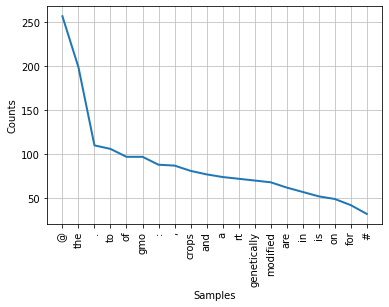

In [34]:
fd = nltk.FreqDist(word.lower() for word in tokens)
fd.plot(20)

In [35]:
#nouns, POS tagging 
permitted_tags = set([
    'NN',
    'NNS',
    'NNP',
    'NNPS',
])
#adjectives
permitted_tags1 = set([
     'JJS',
    'JJ',
    'JJR',                   
])
#verbs
permitted_tags2 = set([
    'VB',
    'VBD',
    'VBG',
    'VBN',
    'VBP',
    'VPZ'
])

In [36]:
import matplotlib.pyplot as plt


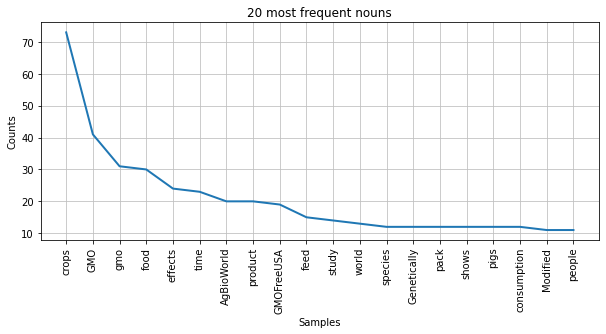

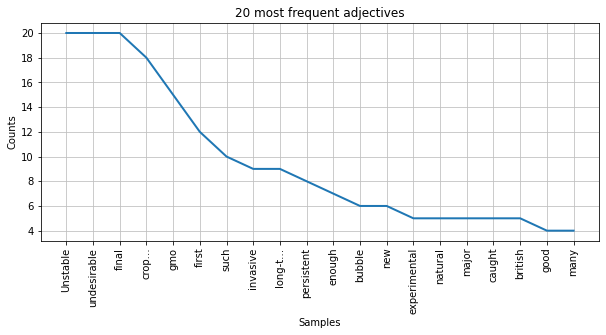

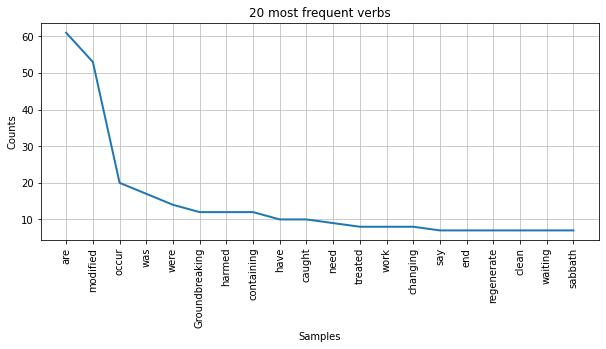

In [37]:
fig = plt.figure(figsize = (10,4))
fd = nltk.FreqDist()

for bit in tagged:
    if bit[1] in permitted_tags and len(bit[0])>2:
        fd[bit[0]] = fd[bit[0]] + 1

plt.title('20 most frequent nouns')       
fd.plot(20)
plt.show()
fig.savefig('nouns')

fig = plt.figure(figsize = (10,4))
fd = nltk.FreqDist()

for bit in tagged:
    if bit[1] in permitted_tags1 and len(bit[0])>2:
        fd[bit[0]] = fd[bit[0]] + 1

plt.title('20 most frequent adjectives')        
fd.plot(20)
plt.show()
fig.savefig('adjectives')

fig = plt.figure(figsize = (10,4))
fd = nltk.FreqDist()

for bit in tagged:
    if bit[1] in permitted_tags2 and len(bit[0])>2:
        fd[bit[0]] = fd[bit[0]] + 1

plt.title('20 most frequent verbs')       
fd.plot(20)
plt.show()
fig.savefig('verbs')

In [38]:
simple_text.collocations()

genetically modified; final product; rarely occur; effects rarely;
undesirable effects; modified ...; Groundbreaking 2013; shows pigs;
2013 study; study shows; first long-t…; feed containing; modified
crops; Genetically Modified; containing GMO; persistent pollution;
Modified Crops; lords sabbath; poverty regenerate; sabbath day
